In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/Downloads/METEC Tests - Sheet3.csv')

X = pd.DataFrame(dataset.iloc[:,:2].values)
Y = pd.DataFrame(dataset.iloc[:,2:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

         0    1
0      186  204
1      186  204
2      185  203
3      186  204
4      186  204
...    ...  ...
30383  181  180
30384  179  180
30385  178  180
30386  180  179
30387  181  180

[30388 rows x 2 columns]
       0
0      0
1      0
2      0
3      0
4      0
...   ..
30383  0
30384  0
30385  0
30386  0
30387  0

[30388 rows x 1 columns]
(24310, 2)
(24310, 1)


In [2]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from mondrianforest import MondrianForestClassifier
from deepforest import CascadeForestClassifier

#load the base DFC model
model = CascadeForestClassifier(n_tolerant_rounds=2, max_layers=20)

n_estimators = 2  # the number of base estimators per cascade layer
estimators = [ExtraTreesClassifier(n_estimators = 107, min_samples_split=7,min_samples_leaf=13,random_state=1),AdaBoostClassifier(n_estimators=90,learning_rate=0.417,random_state=2),XGBClassifier(eta = 1.0, max_depth=11),MondrianForestClassifier(n_tree = 2)]
model.set_estimator(estimators)

In [6]:
model.fit(X_train, Y_train)
# model.save("/Users/eddie/Downloads/ModifiedDFC/T4Weights.pth")

c:\Users\eddie\anaconda3\envs\ModifiedDFC\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[2025-03-22 22:49:56.669] Start to fit the model:
[2025-03-22 22:49:56.669] Fitting cascade layer = 0 
[2025-03-22 22:49:57.961] layer = 0  | Val Acc = 91.407 % | Elapsed = 1.292 s
[2025-03-22 22:49:57.972] Fitting cascade layer = 1 
[2025-03-22 22:50:00.058] layer = 1  | Val Acc = 96.236 % | Elapsed = 2.085 s
[2025-03-22 22:50:00.075] Fitting cascade layer = 2 
[2025-03-22 22:50:02.001] layer = 2  | Val Acc = 96.557 % | Elapsed = 1.926 s
[2025-03-22 22:50:02.018] Fitting cascade layer = 3 
[2025-03-22 22:50:03.834] layer = 3  | Val Acc = 96.392 % | Elapsed = 1.816 s
[2025-03-22 22:50:03.834] Early stopping counter: 1 out of 2
[2025-03-22 22:50:03.851] Fitting cascade layer = 4 
[2025-03-22 22:50:05.751] layer = 4  | Val Acc = 96.183 % | Elapsed = 1.900 s
[2025-03-22 22:50:05.751] Early stopping counter: 2 out of 2
[2025-03-22 22:50:05.751] Handling early stopping
[2025-03-22 22:50:05.751] The optimal number of layers: 3


In [4]:
res = model.predict(X_test)
print(res)
# print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

[2025-03-22 22:48:34.513] Start to evalute the model:
[2025-03-22 22:48:34.513] Evaluating cascade layer = 0 


c:\Users\eddie\anaconda3\envs\ModifiedDFC\lib\site-packages\mondrianforest\classifier.py:76: RuntimeWarning: invalid value encountered in double_scalars
  res[label] /= sum_prob


[0 0 1 ... 1 0 0]
0.9155972359328727
              precision    recall  f1-score   support

           0   0.871676  0.995283  0.929387      3392
           1   0.992744  0.814966  0.895113      2686

    accuracy                       0.915597      6078
   macro avg   0.932210  0.905125  0.912250      6078
weighted avg   0.925178  0.915597  0.914241      6078



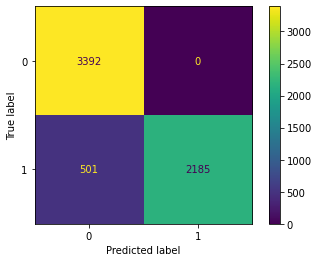

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# fig, ax = cm_display.subplots(figsize=(10, 10))
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix)
cm_display.plot()

In [8]:
from tensorflow.keras.models import load_model
import time
import psutil
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model
# model.load('/Users/eddie/Downloads/ModifiedDFC/T4Weights.pth')

def measure_latency_cpu_usage(model, test_inputs):
    process = psutil.Process()
    cpu_start = process.cpu_percent()
    mem_start = process.memory_info()
    start = time.time()
    predictions = model.predict(X_test)
    end = time.time()
    cpu_end = process.cpu_percent()
    latency = end - start
    cpu_usage = cpu_end - cpu_start
    memory = process.memory_info()
    return latency, cpu_usage, memory.rss/(1024**2)-mem_start.rss/(1024**2)

# Example usage:

testImagesX = [1000,1000]
latency, cpu_usage, memory = measure_latency_cpu_usage(model, testImagesX)

[2025-03-22 22:51:29.976] Start to evalute the model:
[2025-03-22 22:51:29.976] Evaluating cascade layer = 0 
[2025-03-22 22:51:30.114] Evaluating cascade layer = 1 
[2025-03-22 22:51:30.258] Evaluating cascade layer = 2 


In [10]:
print(latency/6078,cpu_usage,memory)

6.56787091550485e-05 99.8 1.25
